<a href="https://colab.research.google.com/github/Nikita-Roy/Image-Filters/blob/main/Invisibility_Cloak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='background.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to background.jpg


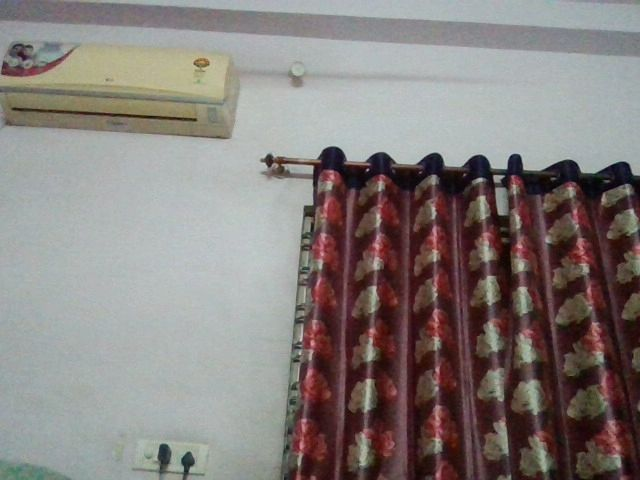

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


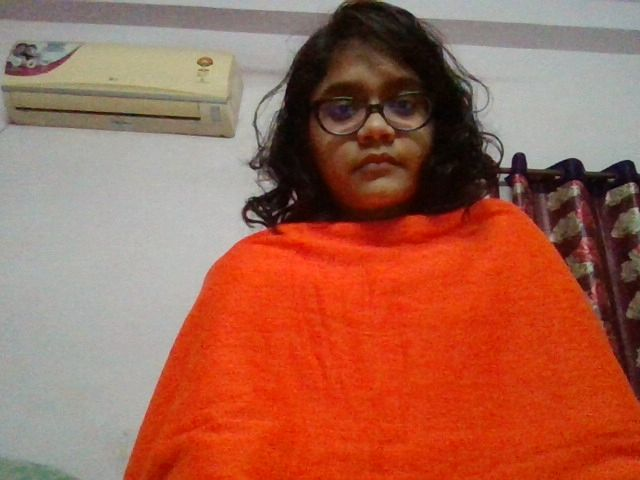

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

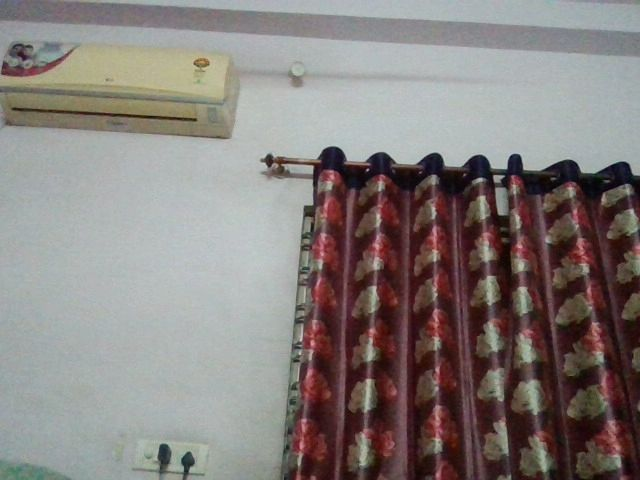

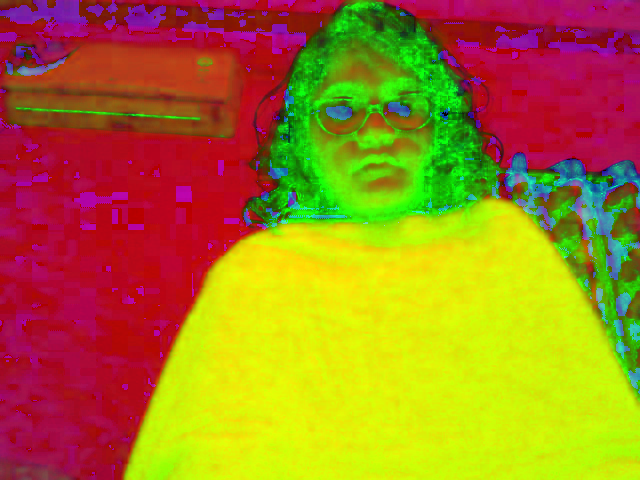

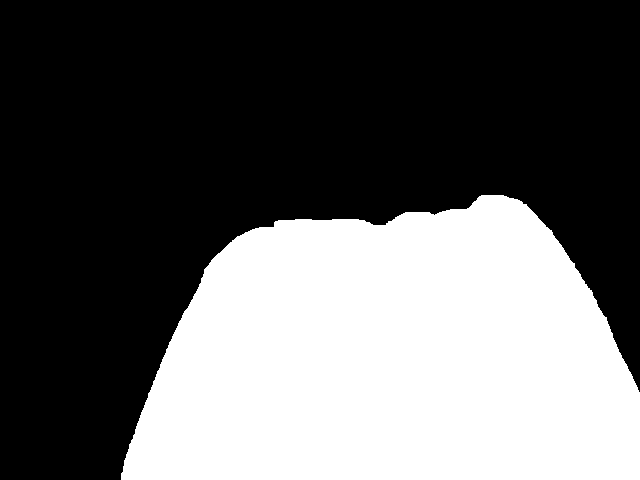

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

#uploaded1 = files.upload()
#uploaded2 = files.upload()

image = cv2.imread('photo.jpg')
background = cv2.imread('background.jpg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

open_kernel = np.ones((5,5),np.uint8)
close_kernel = np.ones((7,7),np.uint8)
dilation_kernel = np.ones((10, 10), np.uint8)

def filter_mask(mask):

    close_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, close_kernel)
    open_mask = cv2.morphologyEx(close_mask, cv2.MORPH_OPEN, open_kernel)
    dilation = cv2.dilate(open_mask, dilation_kernel, iterations= 1)
    return dilation

cv2_imshow(background)
cv2_imshow(hsv)

lower_bound = np.array([0,150,150])     
upper_bound = np.array([20,255,255])
mask = cv2.inRange(hsv, lower_bound, upper_bound)
mask = filter_mask(mask)

cv2_imshow(mask)

In [ ]:
# Apply the mask to take only those region from the saved background 
# where our cloak is present in the current frame
cloak = cv2.bitwise_and(background, background, mask=mask)

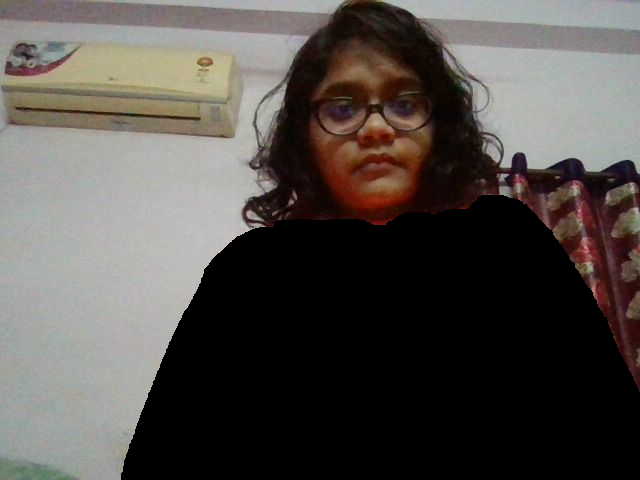

In [ ]:
inverse_mask = cv2.bitwise_not(mask)  
# Apply the inverse mask to take those region of the current frame where cloak is # not present 
current_background = cv2.bitwise_and(image, image, mask=inverse_mask)

cv2_imshow(current_background)

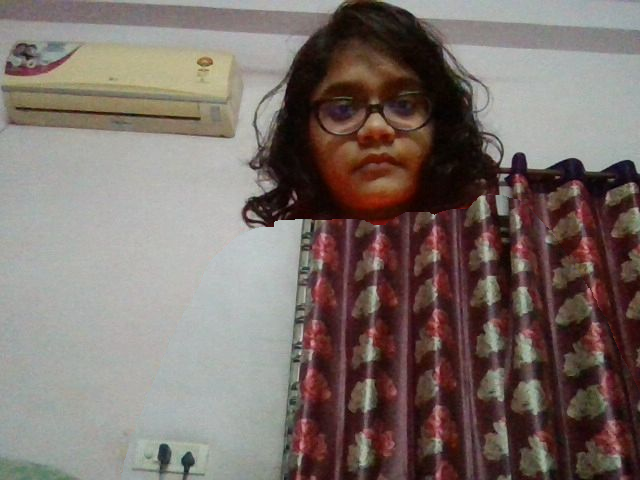

In [ ]:
final_output = cv2.addWeighted(cloak, 1, current_background, 1, 0)
combined = cv2.add(cloak, current_background)

cv2_imshow(combined)